In [1]:
import numpy as np
import scipy
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# some constants
beta = 4.
K0 = 1

upper_K = np.sqrt(2)
lower_K = 0.

def omega(K):
    return 1. - K**2 + 1j*K*np.sqrt(2 - K**2)

In [3]:
def complex_quadrature(func, a, b, **kwargs):
    def real_func(x):
        return scipy.real(func(x))
    def imag_func(x):
        return scipy.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

def integrand(K):
    return np.exp(-beta**2*(K-K0)**2)*np.exp(-1j*K**2*tau/2.)*(np.exp(1j*K*u)-np.exp(-1j*K*u)*omega(K))

def Psi(u_input, tao_input):
    global u
    global tau
    u, tau = u_input, tao_input
    return complex_quadrature(integrand, lower_K, upper_K)[0]

def Psi_square(u_input, tao_input):
    Psi_result = Psi(u_input, tao_input)
    return scipy.real(np.conjugate(Psi_result)*Psi_result)

In [4]:
tau_line = np.arange(-10, 10, 0.1)
u_line = np.arange(-10, 10, 0.1)

In [6]:
t0 = tau_line[0]
psi_square= [Psi_square(i, t0) for i in u_line]
# psi_square = Psi_square(u_line, t0)

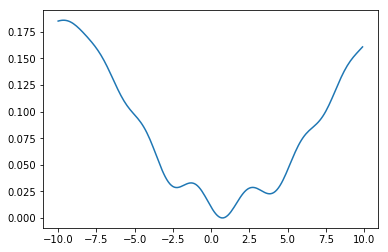

In [7]:
plt.plot(u_line, psi_square)

In [13]:
result = []
for t in tau_line:
    result.append([Psi_square(i, t0) for i in u_line])

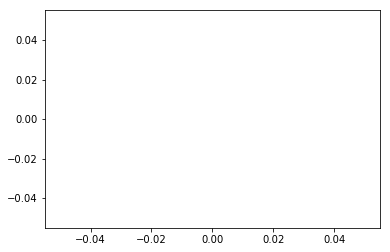

In [16]:
from matplotlib import animation
fig = plt.figure()
ax = plt.axes()
line, = ax.plot([], [], lw=2)
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
# animation function.  This is called sequentially
def animate(t):
    x = u_line
    y = result[t]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(len(result)), interval=200, blit=True)
plt.show()